# WASP-39: JWST ERS Program

In this notebook, we will manipulate WASP-39 data (from NIRSpec) observed by JWST as a part of its Early Release Science (ERS) program. I have downloaded the data from MAST portal. It looks like, they only put Stage 3 calibrated files there: I know this by looking at the name of the files (see, [this page](https://jwst-pipeline.readthedocs.io/en/latest/jwst/data_products/product_types.html)). In any case, let's play with the data!

There are two type of data products (well, there are more, but I am mentioning only those which are useful now): one with `x1dints` extension. These are the files that contain TSO 1-D extracted spectra. Another is an `ecsv` file that contains the white light spectrum.

Without a further ado, let's jump to the data!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [4]:
p1 = '/Users/japa6985/Documents/JWST/jwst-ers'
p2 = '/WASP-39_S3/Data/jw01366-o004_t001_nirspec_clear-prism-s1600a1-sub512'

hdul = fits.open(p1 + '/' + p2 + '/jw01366-o004_t001_nirspec_clear-prism-s1600a1-sub512_x1dints.fits')
hdr = hdul[0].header
hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2022-09-23T14:00:42.689' / UTC date file created                     
ORIGIN  = 'STSCI   '           / Organization responsible for creating file     
TIMESYS = 'UTC     '           / principal time system for time-related keywords
TIMEUNIT= 's       '           / Default unit applicable to all time values     
FILENAME= 'jw01366-o004_t001_nirspec_clear-prism-s1600a1-sub512_x1dints.fits' / 
SDP_VER = '2022_3a '           / Data processing software version number        
PRD_VER = 'PRDOPSSOC-058'      / S&OC PRD version number used in data processing
OSS_VER = '008.004.011.000'    / Observatory Scheduling Software (OSS) version n
CAL_VER = '1.7.2   '        

In [7]:
fits.info(p1 + '/' + p2 + '/jw01366-o004_t001_nirspec_clear-prism-s1600a1-sub512_x1dints.fits')

Filename: /Users/japa6985/Documents/JWST/jwst-ers/Data/MAST_2022-10-14T0901/JWST/jw01366-o004_t001_nirspec_clear-prism-s1600a1-sub512/jw01366-o004_t001_nirspec_clear-prism-s1600a1-sub512_x1dints.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     347   ()      
  1  INT_TIMES     1 BinTableHDU     24   21500R x 7C   [J, D, D, D, D, D, D]   
  2  EXTRACT1D     1 BinTableHDU     81   432R x 18C   [D, D, D, D, D, D, D, D, D, D, D, J, D, D, D, D, D, D]   
  3  EXTRACT1D     2 BinTableHDU     81   432R x 18C   [D, D, D, D, D, D, D, D, D, D, D, J, D, D, D, D, D, D]   
  4  EXTRACT1D     3 BinTableHDU     81   432R x 18C   [D, D, D, D, D, D, D, D, D, D, D, J, D, D, D, D, D, D]   
  5  EXTRACT1D     4 BinTableHDU     81   432R x 18C   [D, D, D, D, D, D, D, D, D, D, D, J, D, D, D, D, D, D]   
  6  EXTRACT1D     5 BinTableHDU     81   432R x 18C   [D, D, D, D, D, D, D, D, D, D, D, J, D, D, D, D, D, D]   
  7  EXTRACT1D     6 BinTableHDU     81  

In [8]:
h1 = hdul[1].header
print(h1)

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                   52 / length of dimension 1                          NAXIS2  =                21500 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                    7 / number of table fields                         EXTNAME = 'INT_TIMES'          / extension name                                 EXTVER  =                    1 / extension value                                TTYPE1  = 'integration_number'                                                  TFORM1  = 'J       '                                                            TTYPE2  = 'int_start_MJD_UTC'           

In [9]:
h2 = hdul[2].header
print(h2)

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  140 / length of dimension 1                          NAXIS2  =                  432 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                   18 / number of table fields                         EXTNAME = 'EXTRACT1D'          / extension name                                 EXTVER  =                    1 / extension value                                TTYPE1  = 'WAVELENGTH'                                                          TFORM1  = 'D       '                                                            TUNIT1  = 'um      '                    

In [13]:
from astropy.table import Table

tab1 = Table.read(hdul[2])
tab1.colnames

['WAVELENGTH',
 'FLUX',
 'FLUX_ERROR',
 'FLUX_VAR_POISSON',
 'FLUX_VAR_RNOISE',
 'FLUX_VAR_FLAT',
 'SURF_BRIGHT',
 'SB_ERROR',
 'SB_VAR_POISSON',
 'SB_VAR_RNOISE',
 'SB_VAR_FLAT',
 'DQ',
 'BACKGROUND',
 'BKGD_ERROR',
 'BKGD_VAR_POISSON',
 'BKGD_VAR_RNOISE',
 'BKGD_VAR_FLAT',
 'NPIXELS']

<ErrorbarContainer object of 3 artists>

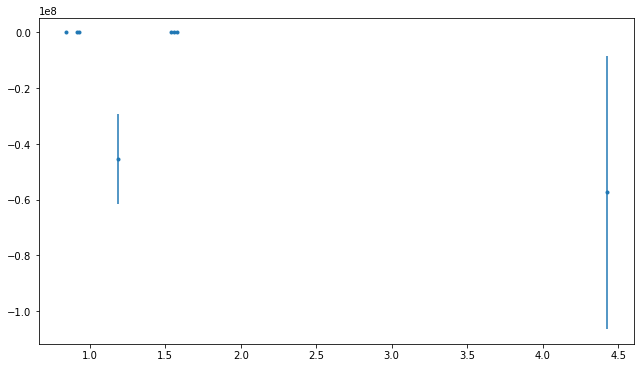

In [14]:
plt.figure(figsize=(16/1.5, 9/1.5))
plt.errorbar(tab1['WAVELENGTH'], tab1['FLUX'], yerr=tab1['FLUX_ERROR'], fmt='.')